<a href="https://colab.research.google.com/github/OnurcanKoken/Crab_Detection_YOLOv5L/blob/main/Colab_Crab_Detection_YOLOv5/Laser_Distance_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laser Distance Calculation - MATE ROV Microsoft Azure - DEU ROV Team

* The distance between two laser dots is 22.86 cm.

Author: Onurcan Köken

Date: 11th of May, 2021

For more info: 

* https://files.materovcompetition.org/2021/Computer_Coding_Challenge_Round_1.pdf

* https://www.materovcompetition.org/content/2021-machine-learning-computer-coding-challenge

* https://forums.marinetech2.org/viewforum.php?f=27&sid=3d90485fff064253abd4132321d08728




reference: https://realpython.com/python-opencv-color-spaces/


In [ ]:
#for colab usage
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#libraries
import math
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


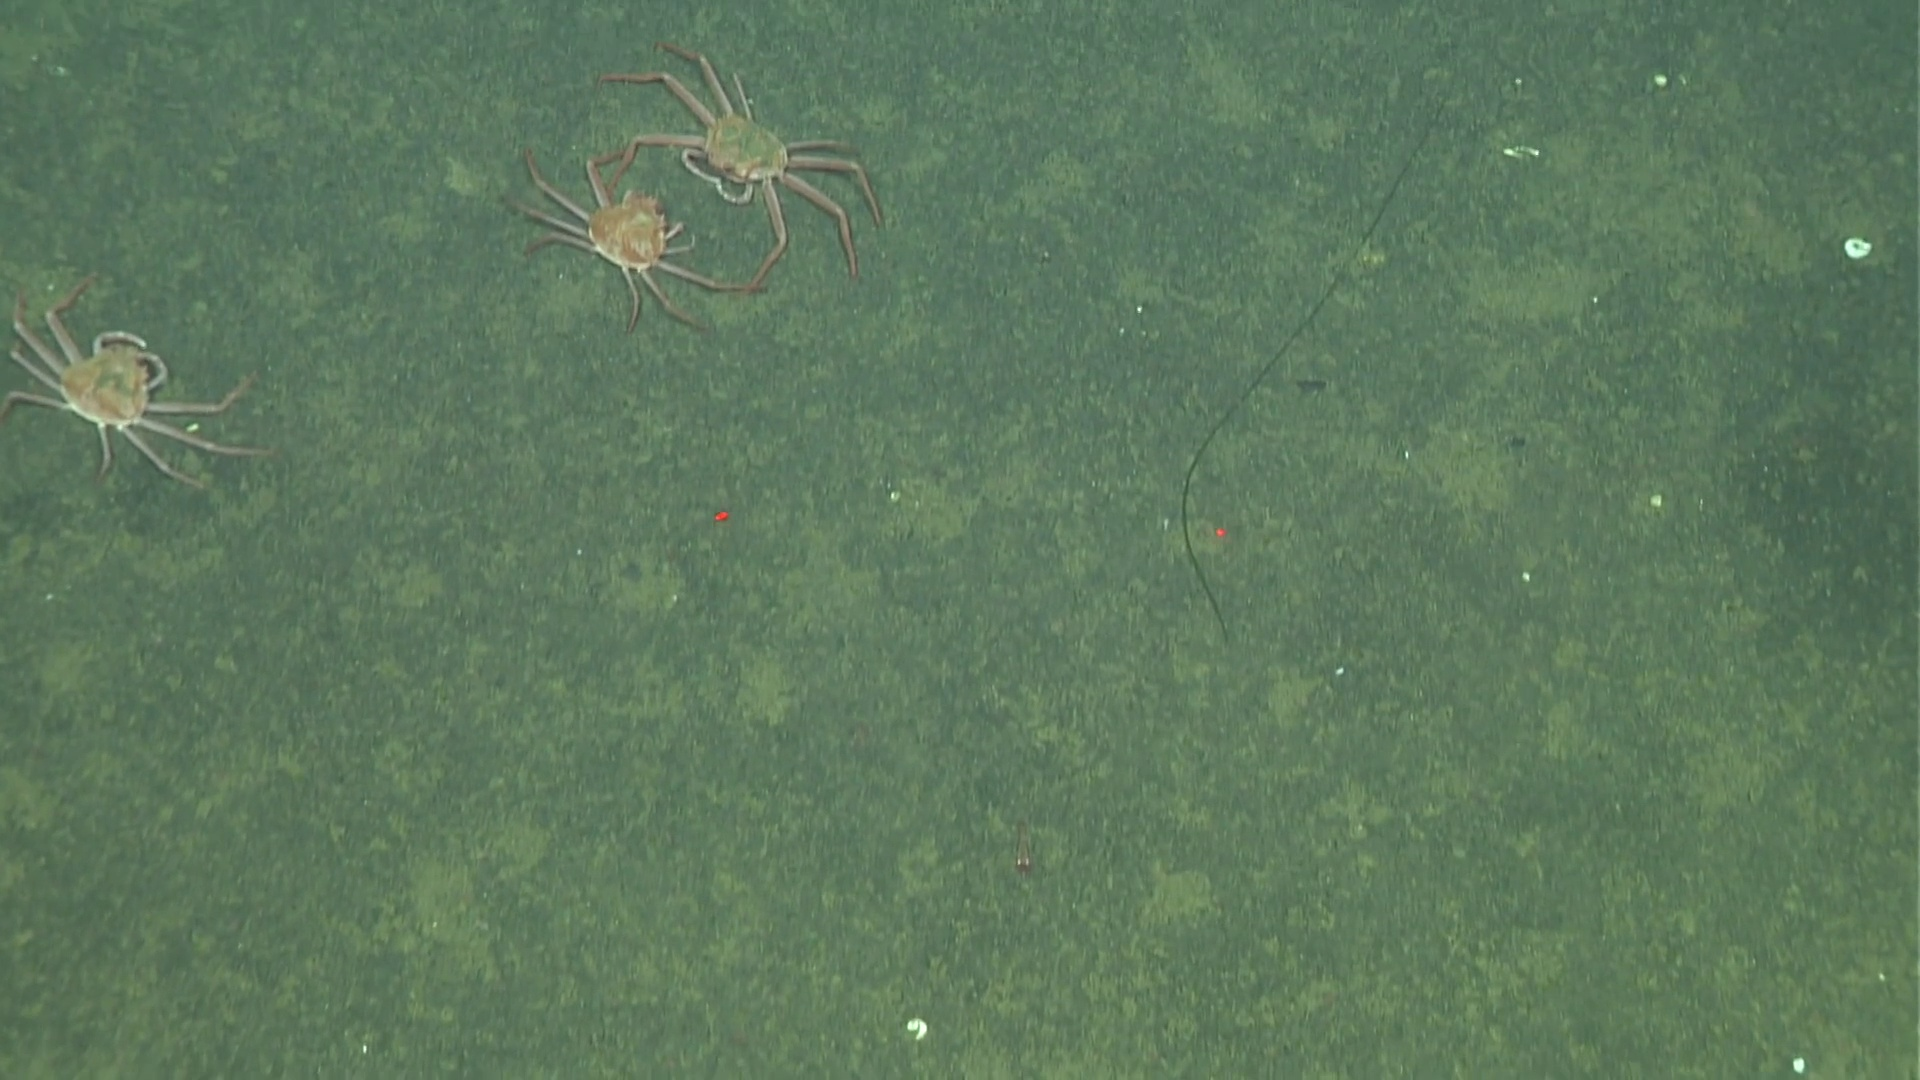

In [ ]:
# read the image
img = cv.imread('/content/gdrive/MyDrive/MATE_ROV_Azure/DistanceCalculation/frame_sec17_490.jpg')

# display the image on colab, be careful it is NOT cv.imshow()
cv2_imshow(img)

In [ ]:
#convert to hsv
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

In [ ]:
#color filters
light_red = (0, 100, 200)
dark_red = (10, 255, 255)

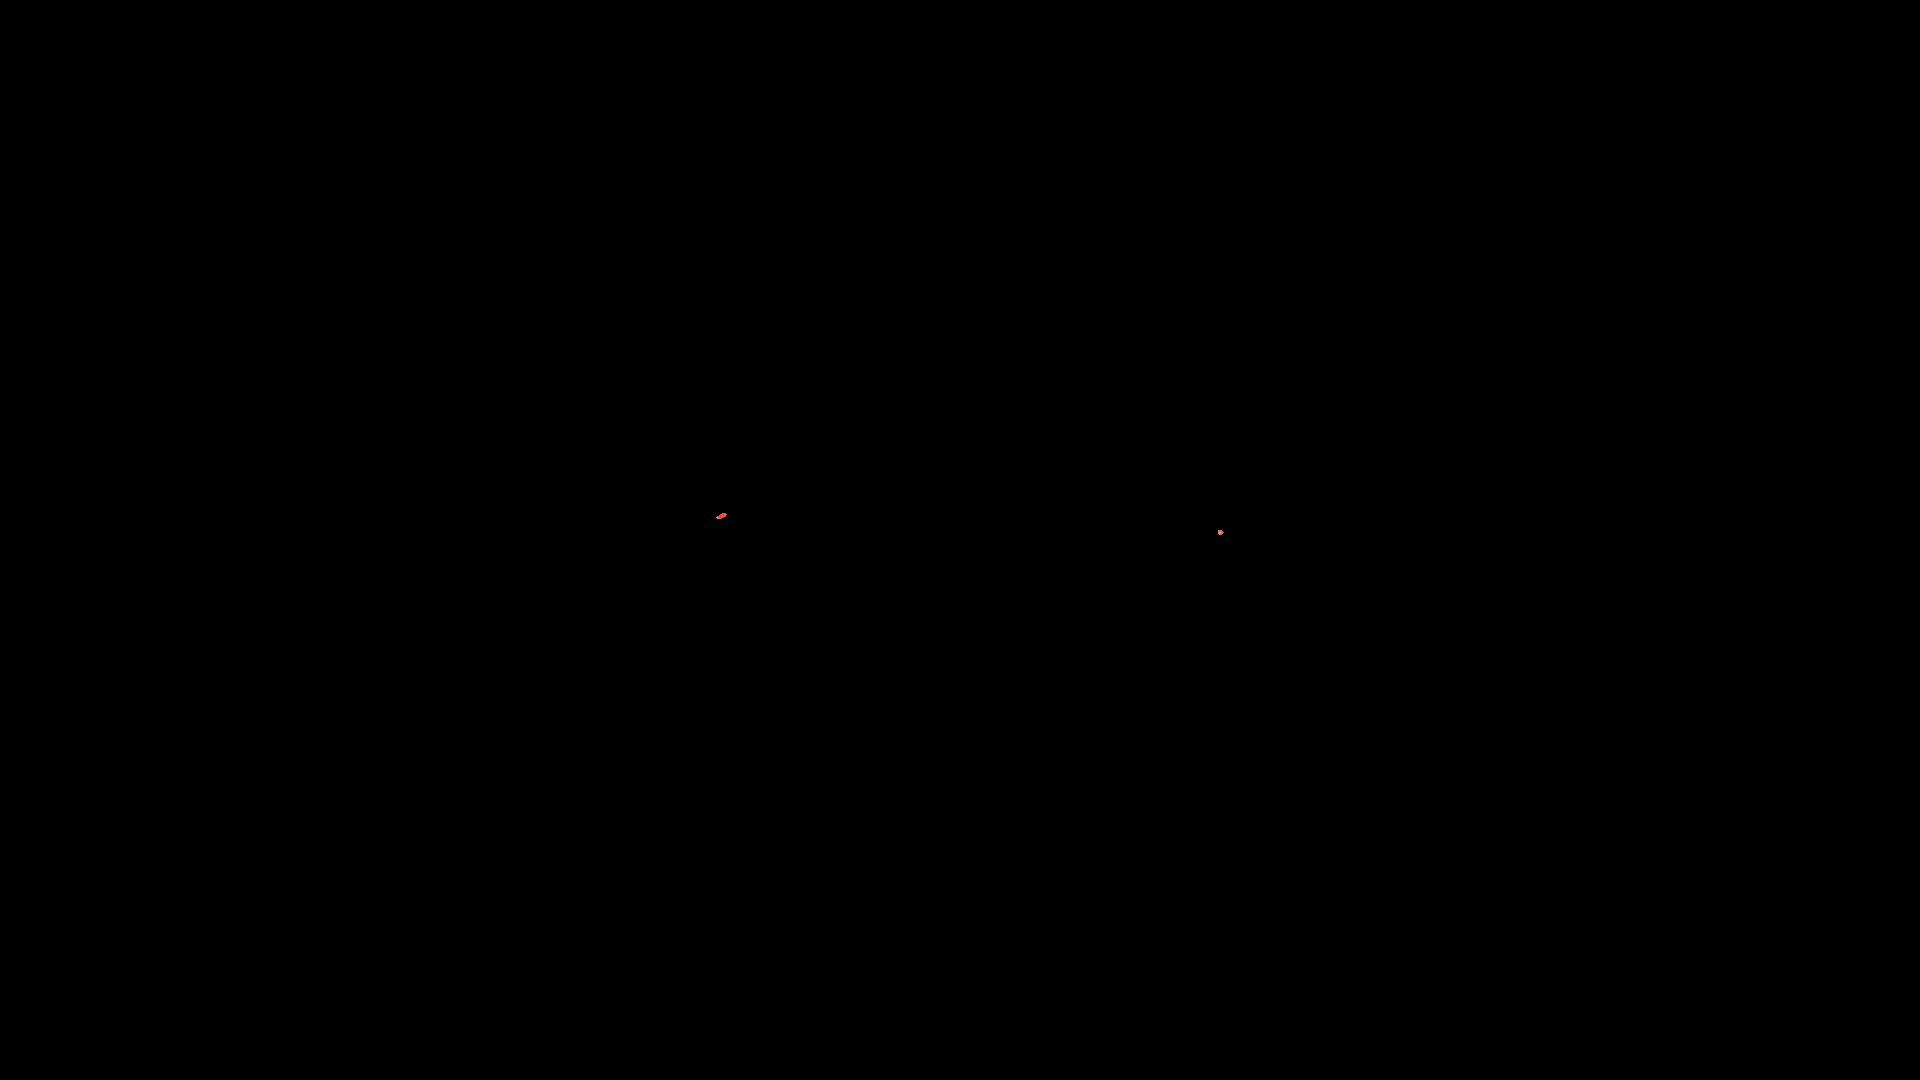

In [ ]:
#masking
mask = cv.inRange(hsv, light_red, dark_red)
result = cv.bitwise_and(img, img, mask = mask)
# display the image on colab, be careful it is NOT cv.imshow()
cv2_imshow(result)

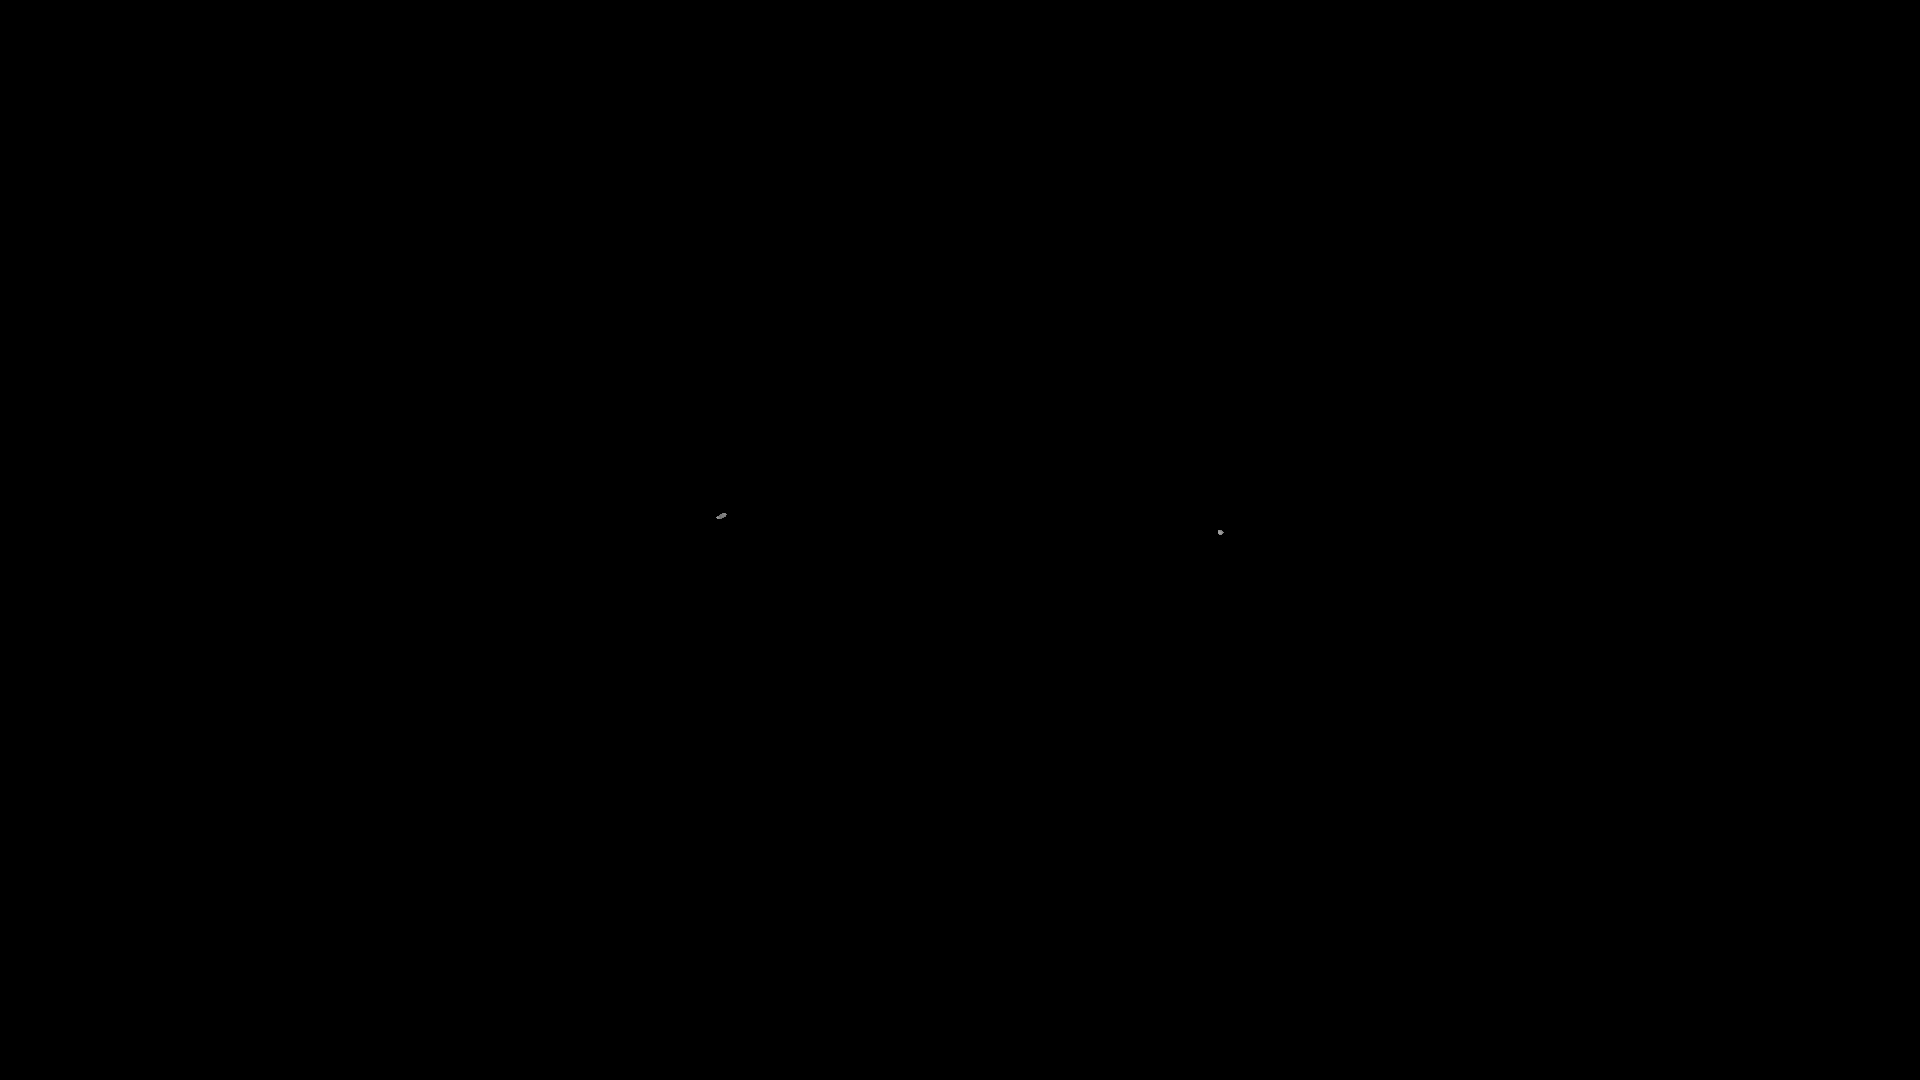

In [ ]:
gray_result = cv.cvtColor(result, cv.COLOR_BGR2GRAY)
# display the image on colab, be careful it is NOT cv.imshow()
cv2_imshow(gray_result)

In [ ]:
## threshold
th, threshed = cv.threshold(gray_result, 100, 255,cv.THRESH_BINARY_INV|cv.THRESH_OTSU)

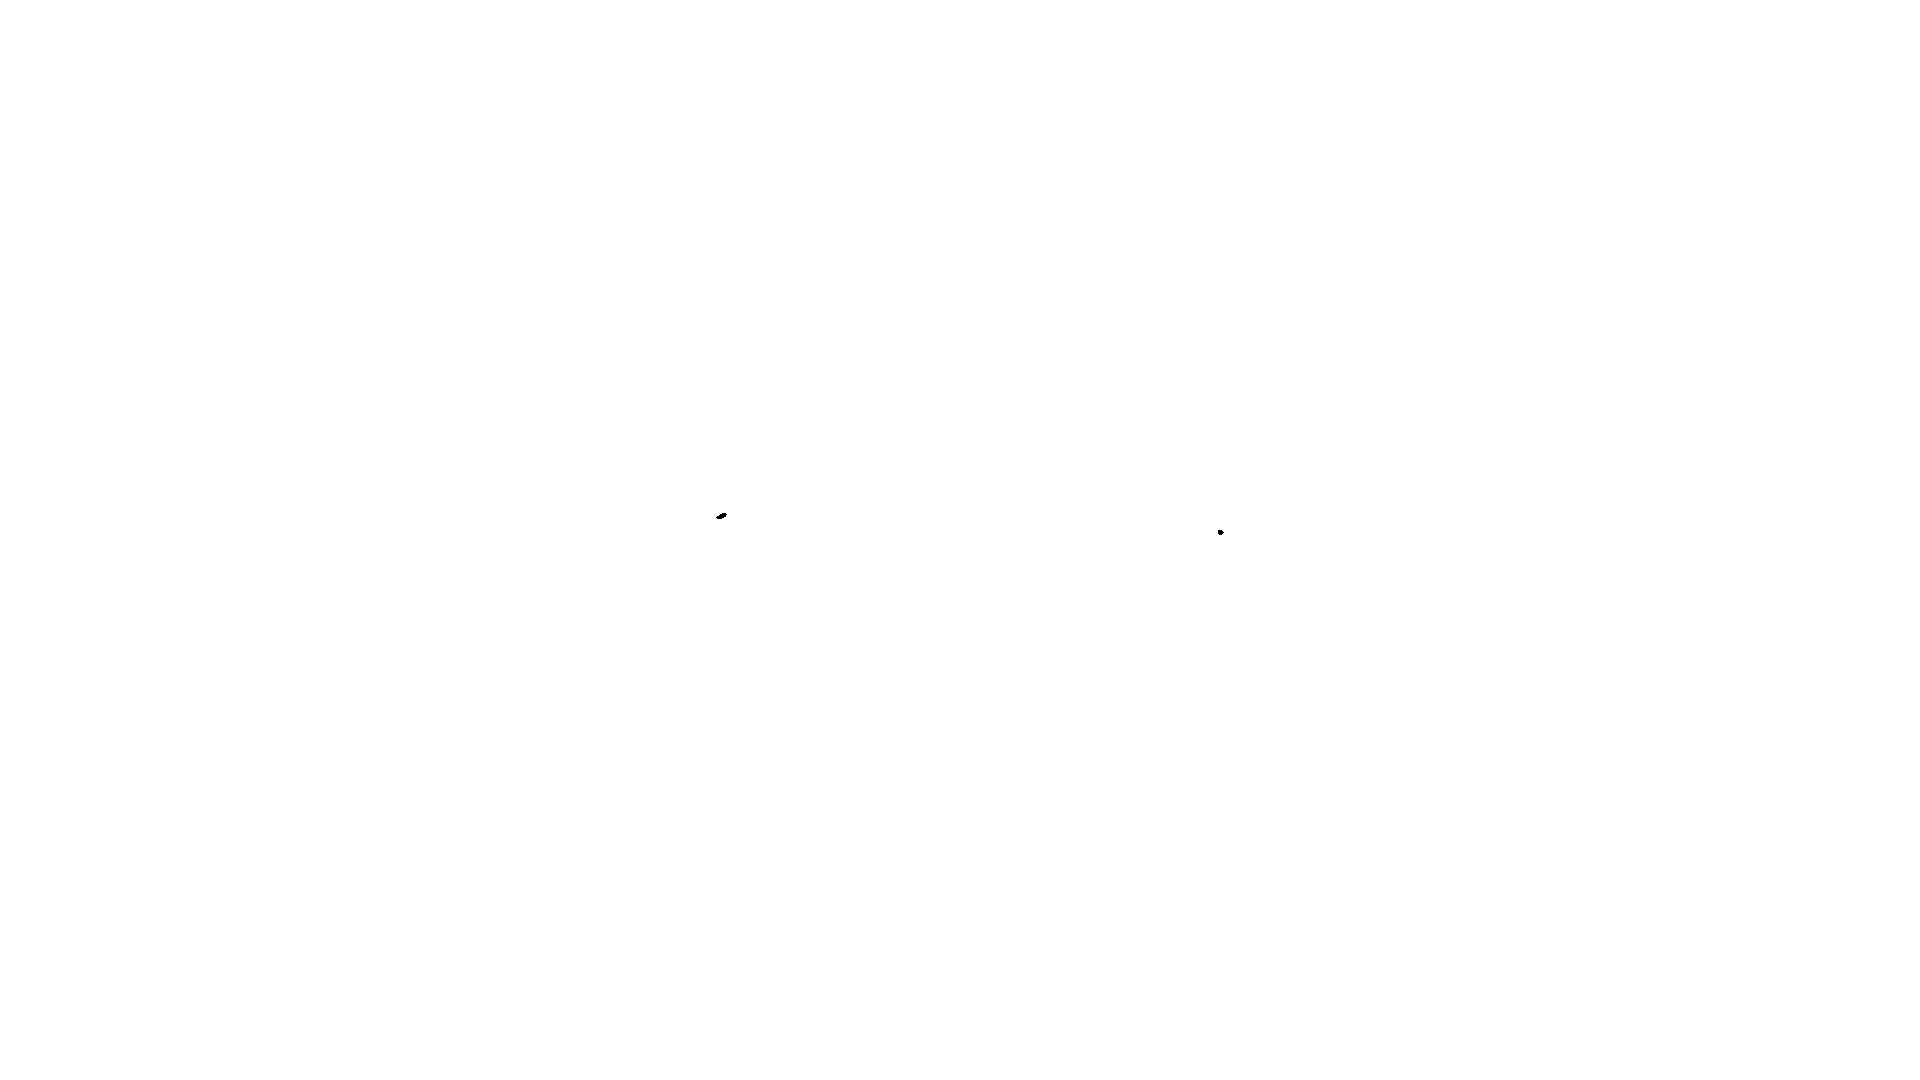

In [ ]:
cv2_imshow(threshed)

In [ ]:
#gray_result = cv.cvtColor(result, cv.COLOR_BGR2GRAY)
# display the image on colab, be careful it is NOT cv.imshow()
#cv2_imshow(gray_result)
#th, threshed = cv.threshold(gray_result, 100, 255,cv.THRESH_BINARY_INV|cv.THRESH_OTSU)
#threshed = new_img.copy()

In [ ]:
#img = cv2.imread('blackdots.jpg')
#gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#ret, thresh = cv2.threshold(gray_img, 170, 255, cv2.THRESH_BINARY) # <--- Try different values here

accum_size = 1
# Minimum distance between the centers of the detected circles.
minDist = 10
#First method-specific parameter. In case of CV_HOUGH_GRADIENT , it is the higher threshold of the two passed to the Canny() edge detector (the lower one is twice smaller).
param1 = 500
# Second method-specific parameter. In case of CV_HOUGH_GRADIENT , it is the accumulator threshold for the circle centers at the detection stage. 
# The smaller it is, the more false circles may be detected. Circles, corresponding to the larger accumulator values, will be returned first.
param2 = 5
#
minRadius = 1
#
maxRadius = 100

circles = cv.HoughCircles(threshed, cv.HOUGH_GRADIENT, accum_size, minDist,
                           param1=param1, param2=param2,
                           minRadius=minRadius, maxRadius=maxRadius)
#circles = circles.reshape(1,circles.shape[1], circles.shape[2])


In [ ]:
circles

array([[[ 720.5,  511.5,    6.2],
        [1220.5,  531.5,    3. ]]], dtype=float32)

In [ ]:
points = []
if circles is not None:
    circles = np.uint16(np.around(circles))
    for ind, i in enumerate(circles[0, :]):
        center = (i[0], i[1])
        points.append(center)
        radius = 15
        cv.circle(threshed, center, radius, (0, 0, 255), 3)
cv.line(threshed, points[0], points[1], (0, 0, 255), 3)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

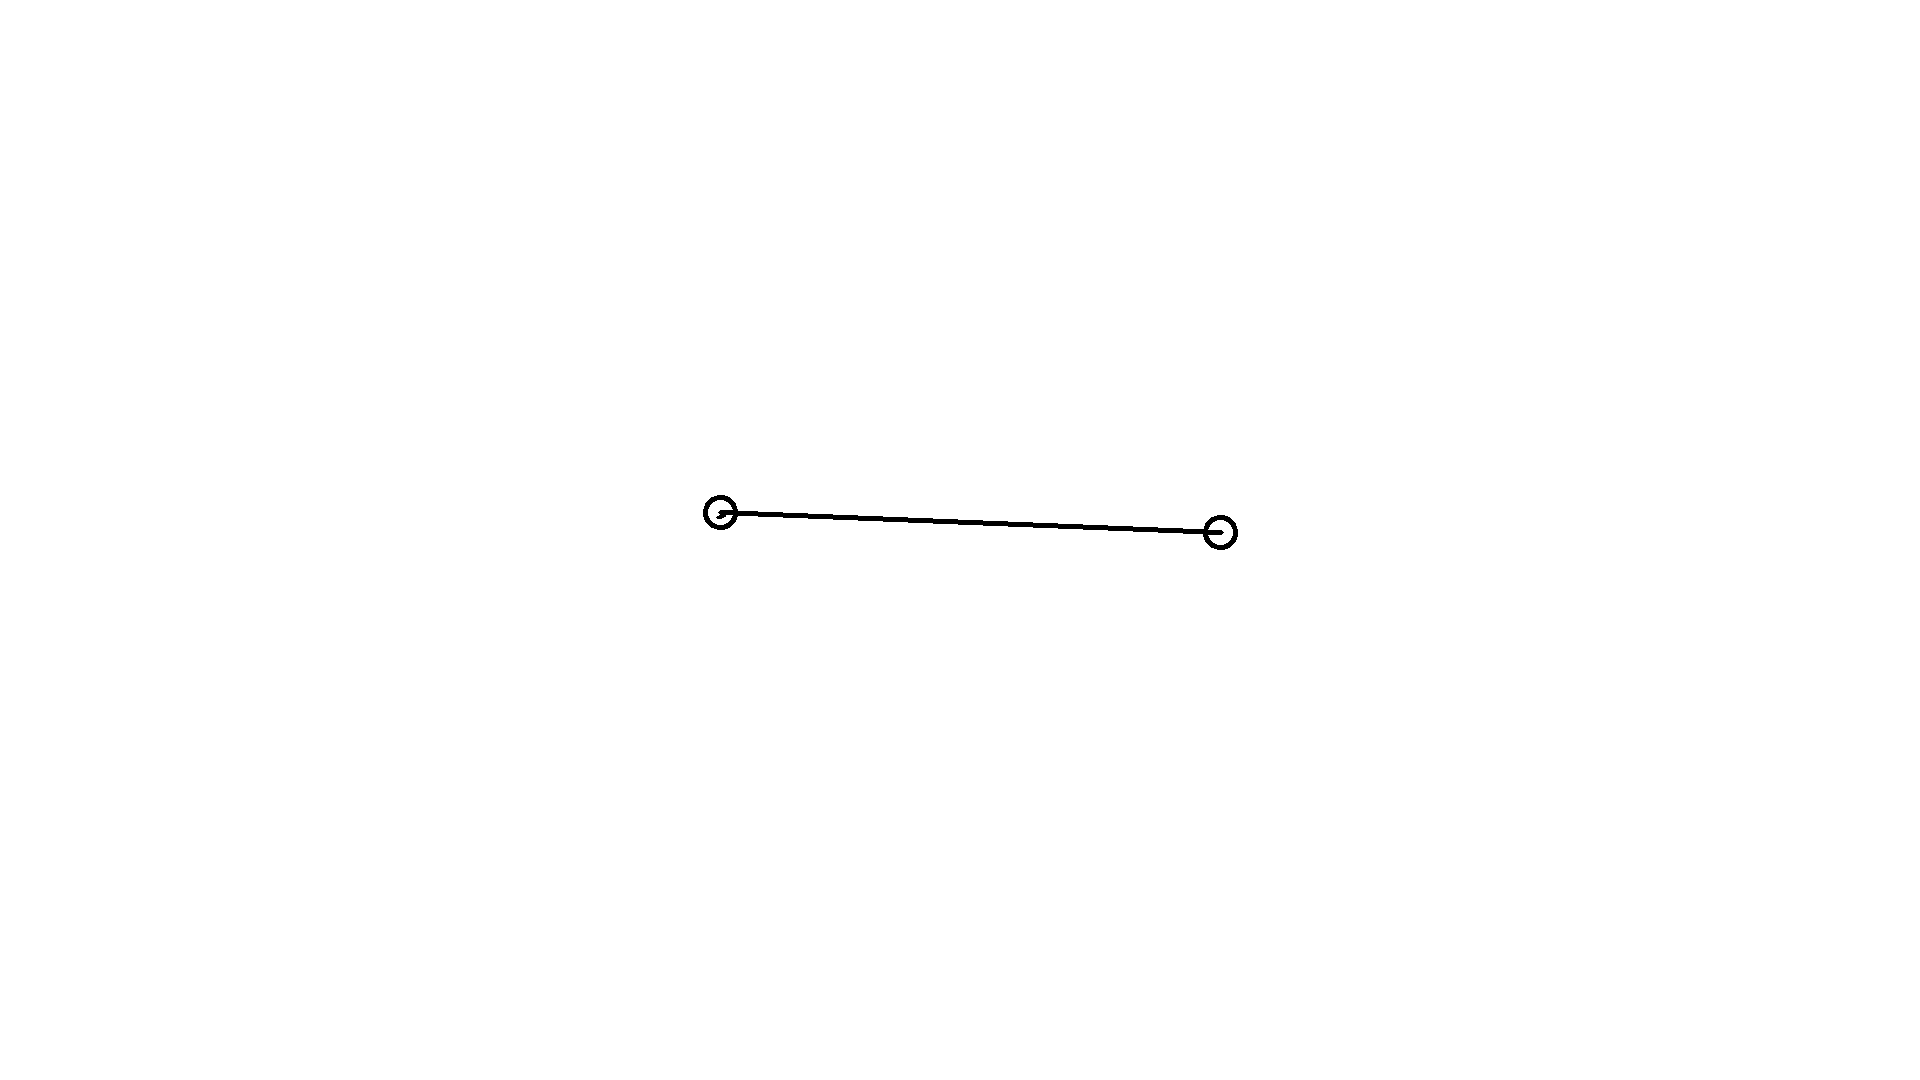

In [ ]:
cv2_imshow(threshed)

In [ ]:
p1, p2 = points

In [ ]:
print(p1, p2)

(720, 512) (1220, 532)


In [ ]:
x1 = int(p1[1])
x2 = int(p2[1])
abs(x1-x2)


20

In [ ]:
# compute the distance between the points (x1, y1) and (x2, y2)
distance = math.sqrt(((p2[1]-p1[1])**2)+((p2[0]-p1[0])**2))
distance

500.39984012787215

In [ ]:
# if distance 

92314.8284513382

In [ ]:
distance = 500.39984012787215

In [ ]:
width = 300

In [ ]:
length = round((width * 22.86)/distance, 2)

In [ ]:
length

13.71

In [ ]:
round(length, 2)

13.71